<a href="https://colab.research.google.com/github/LEEINSEO-0118/optiver/blob/main/TOAD/Optiver_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Import

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os
import random

import torch
import torch.nn as nn
import torch.optim as optim

In [3]:
seed = 2023
random.seed(seed)
np.random.seed(seed)
torch.manual_seed(seed)
torch.cuda.manual_seed_all(seed)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

In [4]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 19 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

# 데이터 로드

In [5]:
                                                                                # 주 폴더
file_path = '/content/drive/MyDrive/ai부트캠프/Deep_Learning/DL_PJT/DATA/optiver-trading-at-the-close/'

train = pd.read_csv(file_path + 'train.csv')
test = pd.read_csv(file_path + 'example_test_files/test.csv')
re_targets = pd.read_csv(file_path + 'example_test_files/revealed_targets.csv')
submission = pd.read_csv(file_path + 'example_test_files/sample_submission.csv')

print(train.shape, test.shape, re_targets.shape, submission.shape)

(5237980, 17) (33000, 16) (33162, 7) (33000, 3)


# EDA

## train

In [6]:
train.head()

,stock_id,date_id,seconds_in_bucket,imbalance_size,imbalance_buy_sell_flag,reference_price,matched_size,far_price,near_price,bid_price,bid_size,ask_price,ask_size,wap,target,time_id,row_id
0,0,0,0,3180602.69,1,0.999812,13380276.64,NaN,NaN,0.999812,60651.50,1.000026,8493.03,1.0,-3.029704,0,0_0_0
1,1,0,0,166603.91,-1,0.999896,1642214.25,NaN,NaN,0.999896,3233.04,1.000660,20605.09,1.0,-5.519986,0,0_0_1
2,2,0,0,302879.87,-1,0.999561,1819368.03,NaN,NaN,0.999403,37956.00,1.000298,18995.00,1.0,-8.389950,0,0_0_2
3,3,0,0,11917682.27,-1,1.000171,18389745.62,NaN,NaN,0.999999,2324.90,1.000214,479032.40,1.0,-4.010200,0,0_0_3
4,4,0,0,447549.96,-1,0.999532,17860614.95,NaN,NaN,0.999394,16485.54,1.000016,434.10,1.0,-7.349849,0,0_0_4


In [7]:
train.info() # row_id 제거 예정

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5237980 entries, 0 to 5237979
Data columns (total 17 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   stock_id                 int64  
 1   date_id                  int64  
 2   seconds_in_bucket        int64  
 3   imbalance_size           float64
 4   imbalance_buy_sell_flag  int64  
 5   reference_price          float64
 6   matched_size             float64
 7   far_price                float64
 8   near_price               float64
 9   bid_price                float64
 10  bid_size                 float64
 11  ask_price                float64
 12  ask_size                 float64
 13  wap                      float64
 14  target                   float64
 15  time_id                  int64  
 16  row_id                   object 
dtypes: float64(11), int64(5), object(1)
memory usage: 679.4+ MB


In [8]:
train.isnull().sum() # far/near price null 값 0으로 대체 예정, 나머지 null 행 삭제

stock_id                         0
date_id                          0
seconds_in_bucket                0
imbalance_size                 220
imbalance_buy_sell_flag          0
reference_price                220
matched_size                   220
far_price                  2894342
near_price                 2857180
bid_price                      220
bid_size                         0
ask_price                      220
ask_size                         0
wap                            220
target                          88
time_id                          0
row_id                           0
dtype: int64

In [9]:
train.target.describe()

count    5.237892e+06
mean    -4.756125e-02
std      9.452860e+00
min     -3.852898e+02
25%     -4.559755e+00
50%     -6.020069e-02
75%      4.409552e+00
max      4.460704e+02
Name: target, dtype: float64

<Axes: ylabel='target'>

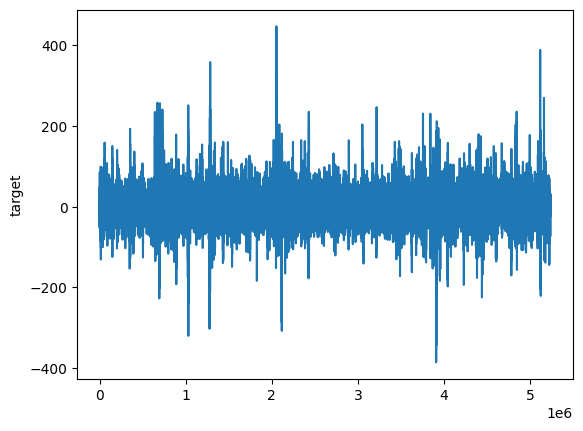

In [10]:
sns.lineplot(data = train, x = train.index, y = train.target)

In [11]:
for col in train.columns:
    print(f'{col} unique values : {len(train[col].unique())}')

stock_id unique values : 200
date_id unique values : 481
seconds_in_bucket unique values : 55
imbalance_size unique values : 2971864
imbalance_buy_sell_flag unique values : 3
reference_price unique values : 28742
matched_size unique values : 2948863
far_price unique values : 95740
near_price unique values : 84626
bid_price unique values : 28314
bid_size unique values : 2591773
ask_price unique values : 28267
ask_size unique values : 2623254
wap unique values : 31507
target unique values : 15935
time_id unique values : 26455
row_id unique values : 5237980


## revealed targets

In [12]:
re_targets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33162 entries, 0 to 33161
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   stock_id           33000 non-null  float64
 1   date_id            33162 non-null  int64  
 2   seconds_in_bucket  33162 non-null  int64  
 3   time_id            33162 non-null  int64  
 4   revealed_target    33000 non-null  float64
 5   revealed_date_id   33000 non-null  float64
 6   revealed_time_id   33000 non-null  float64
dtypes: float64(4), int64(3)
memory usage: 1.8 MB


In [13]:
re_targets.isnull().sum()

stock_id             162
date_id                0
seconds_in_bucket      0
time_id                0
revealed_target      162
revealed_date_id     162
revealed_time_id     162
dtype: int64

revealed target은 test데이터와 매치됨

revealed target의 revealed 데이터들은 동일 주식의 하루 전날의 데이터들.

train 데이터에 revealed target을 만들어서 붙여서 학습해보자.

In [14]:
train[(train.stock_id == 0) & (train.date_id == 477)].head()

,stock_id,date_id,seconds_in_bucket,imbalance_size,imbalance_buy_sell_flag,reference_price,matched_size,far_price,near_price,bid_price,bid_size,ask_price,ask_size,wap,target,time_id,row_id
5193980,0,477,0,7485534.85,-1,1.000308,9375793.14,NaN,NaN,0.999958,9715.50,1.000133,30866.40,1.000000,-2.310276,26235,477_0_0
5194180,0,477,10,6980193.38,-1,1.000133,9881134.61,NaN,NaN,1.000133,12632.36,1.000308,40476.36,1.000175,-7.200241,26236,477_10_0
5194380,0,477,20,6980193.38,-1,1.000133,9881134.61,NaN,NaN,1.000133,44870.60,1.000308,47565.44,1.000218,-7.500052,26237,477_20_0
5194580,0,477,30,6980193.38,-1,1.000133,9881134.61,NaN,NaN,1.000133,15147.40,1.000308,36931.82,1.000184,-12.480021,26238,477_30_0
5194780,0,477,40,6980193.38,-1,1.000133,9881134.61,NaN,NaN,1.000133,28580.00,1.000308,36988.99,1.000209,-9.570122,26239,477_40_0


In [15]:
re_targets[re_targets.stock_id == 0]

,stock_id,date_id,seconds_in_bucket,time_id,revealed_target,revealed_date_id,revealed_time_id
0,0.0,478,0,26290,-2.310276,477.0,26235.0
200,0.0,478,10,26290,-7.200241,477.0,26236.0
400,0.0,478,20,26290,-7.500052,477.0,26237.0
600,0.0,478,30,26290,-12.480021,477.0,26238.0
800,0.0,478,40,26290,-9.570122,477.0,26239.0
...,...,...,...,...,...,...,...
32108,0.0,480,500,26400,1.579523,479.0,26395.0
32308,0.0,480,510,26400,-0.180006,479.0,26396.0
32508,0.0,480,520,26400,2.199411,479.0,26397.0
32708,0.0,480,530,26400,1.929998,479.0,26398.0


## test

In [16]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33000 entries, 0 to 32999
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   stock_id                 33000 non-null  int64  
 1   date_id                  33000 non-null  int64  
 2   seconds_in_bucket        33000 non-null  int64  
 3   imbalance_size           33000 non-null  float64
 4   imbalance_buy_sell_flag  33000 non-null  int64  
 5   reference_price          33000 non-null  float64
 6   matched_size             33000 non-null  float64
 7   far_price                14771 non-null  float64
 8   near_price               15000 non-null  float64
 9   bid_price                33000 non-null  float64
 10  bid_size                 33000 non-null  float64
 11  ask_price                33000 non-null  float64
 12  ask_size                 33000 non-null  float64
 13  wap                      33000 non-null  float64
 14  time_id               

In [17]:
test.isnull().sum() # far/near price는 0으로 대체

stock_id                       0
date_id                        0
seconds_in_bucket              0
imbalance_size                 0
imbalance_buy_sell_flag        0
reference_price                0
matched_size                   0
far_price                  18229
near_price                 18000
bid_price                      0
bid_size                       0
ask_price                      0
ask_size                       0
wap                            0
time_id                        0
row_id                         0
dtype: int64

In [18]:
test.date_id.describe() # 478-480 까지의 date_id가 존재함. triain 에서 위 행들을 제거하고 학습해보자.

count    33000.000000
mean       479.000000
std          0.816509
min        478.000000
25%        478.000000
50%        479.000000
75%        480.000000
max        480.000000
Name: date_id, dtype: float64

In [19]:
test_stock_0 = test[test.stock_id==0]
train[(train.stock_id == 0) & (train.date_id >= 478)].drop(columns = 'target')

,stock_id,date_id,seconds_in_bucket,imbalance_size,imbalance_buy_sell_flag,reference_price,matched_size,far_price,near_price,bid_price,bid_size,ask_price,ask_size,wap,time_id,row_id
5204980,0,478,0,3753451.43,-1,0.999875,11548975.43,NaN,NaN,0.999875,22940.00,1.000050,9177.60,1.000000,26290,478_0_0
5205180,0,478,10,3771174.79,-1,1.000050,11550982.93,NaN,NaN,1.000050,17208.00,1.000224,21456.38,1.000127,26291,478_10_0
5205380,0,478,20,3771174.79,-1,1.000050,11550982.93,NaN,NaN,1.000050,917.76,1.000224,41535.88,1.000054,26292,478_20_0
5205580,0,478,30,4080903.36,-1,1.000224,11539511.50,NaN,NaN,1.000224,30176.62,1.000399,15033.56,1.000341,26293,478_30_0
5205780,0,478,40,4045858.14,-1,1.000224,11574556.71,NaN,NaN,1.000224,20136.87,1.000399,25706.24,1.000301,26294,478_40_0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5236980,0,480,500,0.00,0,0.999017,42161928.97,0.999017,0.999017,0.999017,53827.20,0.999193,146071.08,0.999065,26450,480_500_0
5237180,0,480,510,0.00,0,0.998842,42161928.97,0.998842,0.998842,0.998842,157865.40,0.999017,120926.08,0.998941,26451,480_510_0
5237380,0,480,520,475513.69,-1,0.999193,41686415.27,0.999017,0.999017,0.999193,57596.67,0.999368,46780.58,0.999289,26452,480_520_0
5237580,0,480,530,475513.69,-1,0.999193,41686415.27,0.999017,0.999017,0.999193,156610.53,0.999368,122677.94,0.999291,26453,480_530_0


In [20]:
submission

,time_id,row_id,target
0,26290,478_0_0,1
1,26290,478_0_1,1
2,26290,478_0_2,1
3,26290,478_0_3,1
4,26290,478_0_4,1
...,...,...,...
32995,26454,480_540_195,1
32996,26454,480_540_196,1
32997,26454,480_540_197,1
32998,26454,480_540_198,1


# Data Processing

## Null 값 처리

In [21]:
# far/near price 0대체
train_df = train.copy()
train_df.near_price = train_df.near_price.fillna(0)
train_df.far_price = train_df.far_price.fillna(0)
train_df.isnull().sum()

stock_id                     0
date_id                      0
seconds_in_bucket            0
imbalance_size             220
imbalance_buy_sell_flag      0
reference_price            220
matched_size               220
far_price                    0
near_price                   0
bid_price                  220
bid_size                     0
ask_price                  220
ask_size                     0
wap                        220
target                      88
time_id                      0
row_id                       0
dtype: int64

In [22]:
# train_df = train_df[~train_df.isnull().any(axis = 1)]
# train_df.isnull().sum()
train_df = train_df.dropna()
train_df.isnull().sum()

stock_id                   0
date_id                    0
seconds_in_bucket          0
imbalance_size             0
imbalance_buy_sell_flag    0
reference_price            0
matched_size               0
far_price                  0
near_price                 0
bid_price                  0
bid_size                   0
ask_price                  0
ask_size                   0
wap                        0
target                     0
time_id                    0
row_id                     0
dtype: int64

## Train data에 revealed target 값 추가 --> 이 전에 null값으로 행을 삭제한 것들로 인해 데이터 짝이 맞지 않아서 불가능

In [23]:
# print(range(1, train_df.index[-1] + 1))
# print(range(0, train_df.index[-1]))

In [24]:
# revealed = train_df[['target', 'date_id', 'time_id']]
# # revealed
# revealed = revealed[revealed.date_id != 480].rename(columns = {'target': 'revealed_target', 'date_id': 'revealed_date_id', 'time_id': 'revealed_time_id'})
# revealed

In [25]:
# train_df = train_df[train_df.date_id != 0]

In [26]:
# train_df

In [27]:
# pd.concat([train_df, revealed], axis = 1).isnull().sum()

## Train data에서 time_id, Object 컬럼 삭제

In [28]:
train_df = train_df.drop(columns = 'time_id')
train_df = train_df.drop(columns = 'row_id')
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5237760 entries, 0 to 5237979
Data columns (total 15 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   stock_id                 int64  
 1   date_id                  int64  
 2   seconds_in_bucket        int64  
 3   imbalance_size           float64
 4   imbalance_buy_sell_flag  int64  
 5   reference_price          float64
 6   matched_size             float64
 7   far_price                float64
 8   near_price               float64
 9   bid_price                float64
 10  bid_size                 float64
 11  ask_price                float64
 12  ask_size                 float64
 13  wap                      float64
 14  target                   float64
dtypes: float64(11), int64(4)
memory usage: 639.4 MB


## Data Scaling

In [29]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_ = scaler.fit_transform(train_df.drop(columns = 'target').values)
y_ = train_df.target.values

In [30]:
X_

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        4.36196190e-01, 1.56096684e-04, 4.43855743e-01],
       [5.02512563e-03, 0.00000000e+00, 0.00000000e+00, ...,
        4.40790093e-01, 3.78724386e-04, 4.43855743e-01],
       [1.00502513e-02, 0.00000000e+00, 0.00000000e+00, ...,
        4.38167076e-01, 3.49129863e-04, 4.43855743e-01],
       ...,
       [9.89949749e-01, 1.00000000e+00, 1.00000000e+00, ...,
        4.06176409e-01, 3.30921298e-03, 4.13762736e-01],
       [9.94974874e-01, 1.00000000e+00, 1.00000000e+00, ...,
        4.30283532e-01, 1.23130671e-02, 4.36753134e-01],
       [1.00000000e+00, 1.00000000e+00, 1.00000000e+00, ...,
        4.53738524e-01, 5.51726814e-03, 4.60137327e-01]])

# Modeling

## Data split

In [31]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_, y_, test_size = 0.2, random_state = 2023)

print(X_train.shape, y_train.shape, X_val.shape, y_val.shape)

(4190208, 14) (4190208,) (1047552, 14) (1047552,)


## Data Prepartaion

In [32]:
from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader

In [33]:
X_train

array([[8.29145729e-01, 4.93750000e-01, 7.22222222e-01, ...,
        4.49564883e-01, 4.72956241e-03, 4.54144501e-01],
       [7.18592965e-01, 2.75000000e-01, 7.40740741e-01, ...,
        4.57861444e-01, 5.26926906e-03, 4.59722053e-01],
       [9.89949749e-01, 9.18750000e-01, 8.33333333e-01, ...,
        4.33036976e-01, 1.31574103e-03, 4.40698232e-01],
       ...,
       [1.90954774e-01, 7.02083333e-01, 8.14814815e-01, ...,
        4.54593541e-01, 5.88075551e-04, 4.61676702e-01],
       [8.09045226e-01, 1.35416667e-01, 4.25925926e-01, ...,
        4.34087632e-01, 1.64054960e-04, 4.41134985e-01],
       [9.39698492e-01, 7.08333333e-01, 4.62962963e-01, ...,
        4.38884421e-01, 2.91568977e-04, 4.45581275e-01]])

In [34]:
# Tensor 변환

X_tensor = torch.from_numpy(X_train).float()
y_tensor = torch.from_numpy(y_train).float()
Xval_tensor =  torch.from_numpy(X_val).float()
yval_tensor = torch.from_numpy(y_val).float()

In [35]:
print(X_tensor.shape, y_tensor.shape, Xval_tensor.shape, yval_tensor.shape)

torch.Size([4190208, 14]) torch.Size([4190208]) torch.Size([1047552, 14]) torch.Size([1047552])


In [36]:
batch_size = 2048

# unsqueeze(1) : 평탄화 tensor에 1차원 추가
y_tensor = y_tensor.unsqueeze(1) # 2차원
train_ds = TensorDataset(X_tensor, y_tensor)

yval_tensor = yval_tensor.unsqueeze(1)
val_ds = TensorDataset(Xval_tensor, yval_tensor)

# ▶ DataLoader : batch_size 만큼 데이터를 이동시켜주는 기능, iteration을 효율적으로 빠르게 하기 위함
train_loader = DataLoader(train_ds, batch_size = batch_size, shuffle = True)
val_loader = DataLoader(val_ds, batch_size = batch_size, shuffle = False)

In [37]:
print(X_tensor.shape, y_tensor.shape, Xval_tensor.shape, yval_tensor.shape)

torch.Size([4190208, 14]) torch.Size([4190208, 1]) torch.Size([1047552, 14]) torch.Size([1047552, 1])


## NN 설계

In [38]:
input_dim = X_tensor.shape[1]

class MLP(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(input_dim, 300)
        self.fc2 = nn.Linear(300, 100)
        self.fc3 = nn.Linear(100, 1)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [39]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


Model, Loss Function, Optimizer, epochs

In [40]:
model = MLP().to(device)
loss_func = nn.L1Loss()
optimizer = optim.AdamW(model.parameters(), lr = 0.01)
epochs = 50
model

MLP(
  (fc1): Linear(in_features=14, out_features=300, bias=True)
  (fc2): Linear(in_features=300, out_features=100, bias=True)
  (fc3): Linear(in_features=100, out_features=1, bias=True)
  (relu): ReLU()
)

Scheduler

In [41]:
# from torch.optim import lr_scheduler

# scheduler = lr_scheduler.CosineAnnealingWarmRestarts(optimizer = optimizer,
#                                                      T_0 = 100,
#                                                      T_mult = 1,
#                                                      eta_min = 0.00001)

## 모델 학습

In [42]:
from tqdm.auto import tqdm

In [43]:

train_epoch_loss = []
valid_epoch_loss = []
for epoch in range(epochs):

    train_iter_loss = []
    bar = tqdm(enumerate(train_loader), total = len(train_loader), desc = 'Train Loop')
    model.train()
    for idx, data in bar:
        inputs, values = data[0].to(device), data[1].to(device)
        outputs = model(inputs)
        # print(outputs.shape, values.shape)
        loss = loss_func(outputs, values)
        train_iter_loss.append(loss.item())

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        # if scheduler is not None:
        #     scheduler.step()
        bar.set_postfix(
            Epoch = epoch,
            Current_loss = loss.item(),
            Train_loss = sum(train_iter_loss) / (idx + 1),
            LR = optimizer.param_groups[0]['lr']
        )
    print(f'Epoch [{epoch+1}/{epochs}] - Train loss : {sum(train_iter_loss)/len(train_loader):.4f}')
    train_epoch_loss.append(sum(train_iter_loss) / len(train_loader))

    val_iter_loss = []
    bar = tqdm(enumerate(val_loader), total = len(val_loader), desc = 'Valid Loop')
    model.eval()
    for idx, data in bar:
        with torch.no_grad():
            inputs, values = data[0].to(device), data[1].to(device)
            outputs = model(inputs)
            loss = loss_func(outputs, values)
            val_iter_loss.append(loss.item())
            bar.set_postfix(
                Epoch = epoch,
                Current_loss = loss.item(),
                Train_loss = sum(val_iter_loss) / (idx + 1)
            )
    print(f'Epoch [{epoch+1}/{epochs}] - Valid loss : {sum(val_iter_loss)/len(val_loader):.4f}')
    valid_epoch_loss.append(sum(val_iter_loss)/len(val_loader))

Train Loop:   0%|          | 0/2046 [00:00<?, ?it/s]

Epoch [1/50] - Train loss : 6.4080


Valid Loop:   0%|          | 0/512 [00:00<?, ?it/s]

Epoch [1/50] - Valid loss : 6.3981


Train Loop:   0%|          | 0/2046 [00:00<?, ?it/s]

Epoch [2/50] - Train loss : 6.4057


Valid Loop:   0%|          | 0/512 [00:00<?, ?it/s]

Epoch [2/50] - Valid loss : 6.3939


Train Loop:   0%|          | 0/2046 [00:00<?, ?it/s]

Epoch [3/50] - Train loss : 6.4008


Valid Loop:   0%|          | 0/512 [00:00<?, ?it/s]

Epoch [3/50] - Valid loss : 6.3846


Train Loop:   0%|          | 0/2046 [00:00<?, ?it/s]

Epoch [4/50] - Train loss : 6.3919


Valid Loop:   0%|          | 0/512 [00:00<?, ?it/s]

Epoch [4/50] - Valid loss : 6.3748


Train Loop:   0%|          | 0/2046 [00:00<?, ?it/s]

Epoch [5/50] - Train loss : 6.3855


Valid Loop:   0%|          | 0/512 [00:00<?, ?it/s]

Epoch [5/50] - Valid loss : 6.3708


Train Loop:   0%|          | 0/2046 [00:00<?, ?it/s]

Epoch [6/50] - Train loss : 6.3863


Valid Loop:   0%|          | 0/512 [00:00<?, ?it/s]

Epoch [6/50] - Valid loss : 6.3708


Train Loop:   0%|          | 0/2046 [00:00<?, ?it/s]

Epoch [7/50] - Train loss : 6.3793


Valid Loop:   0%|          | 0/512 [00:00<?, ?it/s]

Epoch [7/50] - Valid loss : 6.3857


Train Loop:   0%|          | 0/2046 [00:00<?, ?it/s]

Epoch [8/50] - Train loss : 6.3765


Valid Loop:   0%|          | 0/512 [00:00<?, ?it/s]

Epoch [8/50] - Valid loss : 6.3691


Train Loop:   0%|          | 0/2046 [00:00<?, ?it/s]

Epoch [9/50] - Train loss : 6.3815


Valid Loop:   0%|          | 0/512 [00:00<?, ?it/s]

Epoch [9/50] - Valid loss : 6.3769


Train Loop:   0%|          | 0/2046 [00:00<?, ?it/s]

Epoch [10/50] - Train loss : 6.3799


Valid Loop:   0%|          | 0/512 [00:00<?, ?it/s]

Epoch [10/50] - Valid loss : 6.3749


Train Loop:   0%|          | 0/2046 [00:00<?, ?it/s]

Epoch [11/50] - Train loss : 6.3790


Valid Loop:   0%|          | 0/512 [00:00<?, ?it/s]

Epoch [11/50] - Valid loss : 6.3967


Train Loop:   0%|          | 0/2046 [00:00<?, ?it/s]

Epoch [12/50] - Train loss : 6.3863


Valid Loop:   0%|          | 0/512 [00:00<?, ?it/s]

Epoch [12/50] - Valid loss : 6.3783


Train Loop:   0%|          | 0/2046 [00:00<?, ?it/s]

Epoch [13/50] - Train loss : 6.3915


Valid Loop:   0%|          | 0/512 [00:00<?, ?it/s]

Epoch [13/50] - Valid loss : 6.3798


Train Loop:   0%|          | 0/2046 [00:00<?, ?it/s]

Epoch [14/50] - Train loss : 6.3852


Valid Loop:   0%|          | 0/512 [00:00<?, ?it/s]

Epoch [14/50] - Valid loss : 6.3691


Train Loop:   0%|          | 0/2046 [00:00<?, ?it/s]

Epoch [15/50] - Train loss : 6.3776


Valid Loop:   0%|          | 0/512 [00:00<?, ?it/s]

Epoch [15/50] - Valid loss : 6.3602


Train Loop:   0%|          | 0/2046 [00:00<?, ?it/s]

Epoch [16/50] - Train loss : 6.3743


Valid Loop:   0%|          | 0/512 [00:00<?, ?it/s]

Epoch [16/50] - Valid loss : 6.3716


Train Loop:   0%|          | 0/2046 [00:00<?, ?it/s]

Epoch [17/50] - Train loss : 6.3806


Valid Loop:   0%|          | 0/512 [00:00<?, ?it/s]

Epoch [17/50] - Valid loss : 6.3810


Train Loop:   0%|          | 0/2046 [00:00<?, ?it/s]

Epoch [18/50] - Train loss : 6.3842


Valid Loop:   0%|          | 0/512 [00:00<?, ?it/s]

Epoch [18/50] - Valid loss : 6.3680


Train Loop:   0%|          | 0/2046 [00:00<?, ?it/s]

Epoch [19/50] - Train loss : 6.3877


Valid Loop:   0%|          | 0/512 [00:00<?, ?it/s]

Epoch [19/50] - Valid loss : 6.3821


Train Loop:   0%|          | 0/2046 [00:00<?, ?it/s]

Epoch [20/50] - Train loss : 6.3894


Valid Loop:   0%|          | 0/512 [00:00<?, ?it/s]

Epoch [20/50] - Valid loss : 6.3776


Train Loop:   0%|          | 0/2046 [00:00<?, ?it/s]

Epoch [21/50] - Train loss : 6.3874


Valid Loop:   0%|          | 0/512 [00:00<?, ?it/s]

Epoch [21/50] - Valid loss : 6.3733


Train Loop:   0%|          | 0/2046 [00:00<?, ?it/s]

Epoch [22/50] - Train loss : 6.3814


Valid Loop:   0%|          | 0/512 [00:00<?, ?it/s]

Epoch [22/50] - Valid loss : 6.3667


Train Loop:   0%|          | 0/2046 [00:00<?, ?it/s]

Epoch [23/50] - Train loss : 6.3777


Valid Loop:   0%|          | 0/512 [00:00<?, ?it/s]

Epoch [23/50] - Valid loss : 6.3662


Train Loop:   0%|          | 0/2046 [00:00<?, ?it/s]

Epoch [24/50] - Train loss : 6.3757


Valid Loop:   0%|          | 0/512 [00:00<?, ?it/s]

Epoch [24/50] - Valid loss : 6.3636


Train Loop:   0%|          | 0/2046 [00:00<?, ?it/s]

Epoch [25/50] - Train loss : 6.3739


Valid Loop:   0%|          | 0/512 [00:00<?, ?it/s]

Epoch [25/50] - Valid loss : 6.3614


Train Loop:   0%|          | 0/2046 [00:00<?, ?it/s]

Epoch [26/50] - Train loss : 6.3747


Valid Loop:   0%|          | 0/512 [00:00<?, ?it/s]

Epoch [26/50] - Valid loss : 6.3617


Train Loop:   0%|          | 0/2046 [00:00<?, ?it/s]

Epoch [27/50] - Train loss : 6.3787


Valid Loop:   0%|          | 0/512 [00:00<?, ?it/s]

Epoch [27/50] - Valid loss : 6.3727


Train Loop:   0%|          | 0/2046 [00:00<?, ?it/s]

Epoch [28/50] - Train loss : 6.3976


Valid Loop:   0%|          | 0/512 [00:00<?, ?it/s]

Epoch [28/50] - Valid loss : 6.3872


Train Loop:   0%|          | 0/2046 [00:00<?, ?it/s]

Epoch [29/50] - Train loss : 6.3964


Valid Loop:   0%|          | 0/512 [00:00<?, ?it/s]

Epoch [29/50] - Valid loss : 6.3865


Train Loop:   0%|          | 0/2046 [00:00<?, ?it/s]

Epoch [30/50] - Train loss : 6.3953


Valid Loop:   0%|          | 0/512 [00:00<?, ?it/s]

Epoch [30/50] - Valid loss : 6.3834


Train Loop:   0%|          | 0/2046 [00:00<?, ?it/s]

Epoch [31/50] - Train loss : 6.3912


Valid Loop:   0%|          | 0/512 [00:00<?, ?it/s]

Epoch [31/50] - Valid loss : 6.3787


Train Loop:   0%|          | 0/2046 [00:00<?, ?it/s]

Epoch [32/50] - Train loss : 6.4032


Valid Loop:   0%|          | 0/512 [00:00<?, ?it/s]

Epoch [32/50] - Valid loss : 6.3971


Train Loop:   0%|          | 0/2046 [00:00<?, ?it/s]

Epoch [33/50] - Train loss : 6.4065


Valid Loop:   0%|          | 0/512 [00:00<?, ?it/s]

Epoch [33/50] - Valid loss : 6.3968


Train Loop:   0%|          | 0/2046 [00:00<?, ?it/s]

Epoch [34/50] - Train loss : 6.4068


Valid Loop:   0%|          | 0/512 [00:00<?, ?it/s]

Epoch [34/50] - Valid loss : 6.3965


Train Loop:   0%|          | 0/2046 [00:00<?, ?it/s]

Epoch [35/50] - Train loss : 6.4061


Valid Loop:   0%|          | 0/512 [00:00<?, ?it/s]

Epoch [35/50] - Valid loss : 6.3974


Train Loop:   0%|          | 0/2046 [00:00<?, ?it/s]

Epoch [36/50] - Train loss : 6.4062


Valid Loop:   0%|          | 0/512 [00:00<?, ?it/s]

Epoch [36/50] - Valid loss : 6.3967


Train Loop:   0%|          | 0/2046 [00:00<?, ?it/s]

Epoch [37/50] - Train loss : 6.4059


Valid Loop:   0%|          | 0/512 [00:00<?, ?it/s]

Epoch [37/50] - Valid loss : 6.3962


Train Loop:   0%|          | 0/2046 [00:00<?, ?it/s]

Epoch [38/50] - Train loss : 6.4059


Valid Loop:   0%|          | 0/512 [00:00<?, ?it/s]

Epoch [38/50] - Valid loss : 6.3972


Train Loop:   0%|          | 0/2046 [00:00<?, ?it/s]

Epoch [39/50] - Train loss : 6.4059


Valid Loop:   0%|          | 0/512 [00:00<?, ?it/s]

Epoch [39/50] - Valid loss : 6.3957


Train Loop:   0%|          | 0/2046 [00:00<?, ?it/s]

Epoch [40/50] - Train loss : 6.4057


Valid Loop:   0%|          | 0/512 [00:00<?, ?it/s]

Epoch [40/50] - Valid loss : 6.3959


Train Loop:   0%|          | 0/2046 [00:00<?, ?it/s]

Epoch [41/50] - Train loss : 6.4054


Valid Loop:   0%|          | 0/512 [00:00<?, ?it/s]

Epoch [41/50] - Valid loss : 6.3955


Train Loop:   0%|          | 0/2046 [00:00<?, ?it/s]

Epoch [42/50] - Train loss : 6.4057


Valid Loop:   0%|          | 0/512 [00:00<?, ?it/s]

Epoch [42/50] - Valid loss : 6.3962


Train Loop:   0%|          | 0/2046 [00:00<?, ?it/s]

Epoch [43/50] - Train loss : 6.4052


Valid Loop:   0%|          | 0/512 [00:00<?, ?it/s]

Epoch [43/50] - Valid loss : 6.3950


Train Loop:   0%|          | 0/2046 [00:00<?, ?it/s]

Epoch [44/50] - Train loss : 6.4051


Valid Loop:   0%|          | 0/512 [00:00<?, ?it/s]

Epoch [44/50] - Valid loss : 6.3965


Train Loop:   0%|          | 0/2046 [00:00<?, ?it/s]

Epoch [45/50] - Train loss : 6.4050


Valid Loop:   0%|          | 0/512 [00:00<?, ?it/s]

Epoch [45/50] - Valid loss : 6.3964


Train Loop:   0%|          | 0/2046 [00:00<?, ?it/s]

Epoch [46/50] - Train loss : 6.4047


Valid Loop:   0%|          | 0/512 [00:00<?, ?it/s]

Epoch [46/50] - Valid loss : 6.3965


Train Loop:   0%|          | 0/2046 [00:00<?, ?it/s]

Epoch [47/50] - Train loss : 6.4049


Valid Loop:   0%|          | 0/512 [00:00<?, ?it/s]

Epoch [47/50] - Valid loss : 6.3959


Train Loop:   0%|          | 0/2046 [00:00<?, ?it/s]

Epoch [48/50] - Train loss : 6.4039


Valid Loop:   0%|          | 0/512 [00:00<?, ?it/s]

Epoch [48/50] - Valid loss : 6.3929


Train Loop:   0%|          | 0/2046 [00:00<?, ?it/s]

Epoch [49/50] - Train loss : 6.4037


Valid Loop:   0%|          | 0/512 [00:00<?, ?it/s]

Epoch [49/50] - Valid loss : 6.3925


Train Loop:   0%|          | 0/2046 [00:00<?, ?it/s]

Epoch [50/50] - Train loss : 6.4026


Valid Loop:   0%|          | 0/512 [00:00<?, ?it/s]

Epoch [50/50] - Valid loss : 6.3923


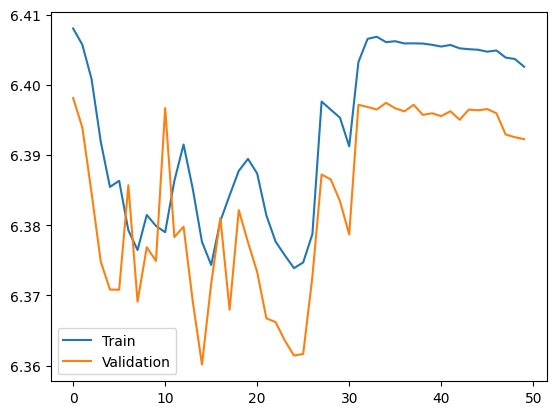

In [44]:
sns.lineplot(data = train_epoch_loss, label = 'Train')
sns.lineplot(data = valid_epoch_loss, label = 'Validation')

plt.show()

In [55]:
train_epoch_loss.index(min(train_epoch_loss))

24

In [58]:
train_min = min(train_epoch_loss)
print(f'Best Train Loss : Epoch [{train_epoch_loss.index(train_min)}/{len(train_epoch_loss)+1}] - Train loss : {train_min}')
valid_min = min(valid_epoch_loss)
print(f'Best Valid Loss : Epoch [{valid_epoch_loss.index(valid_min)}/{len(valid_epoch_loss)+1}] - Valid loss : {valid_min}')

Best Train Loss : Epoch [24/51] - Train loss : 6.3738794149657965
Best Valid Loss : Epoch [14/51] - Valid loss : 6.360161683522165


## Save Model

In [45]:
checkpoint = {'model': MLP(),
              'state_dict': model.state_dict(),
              'optimizer' : optimizer.state_dict()}

torch.save(checkpoint, 'checkpoint.pth')

# 예측

In [46]:
# kaggle

# test_df = test.drop(columns = 'row_id')

In [47]:
# colab

test.isnull().sum()
test_df = test.copy()
test_df.near_price = test_df.near_price.fillna(0)
test_df.far_price = test_df.far_price.fillna(0)
test_df = test_df.drop(columns = 'row_id')
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33000 entries, 0 to 32999
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   stock_id                 33000 non-null  int64  
 1   date_id                  33000 non-null  int64  
 2   seconds_in_bucket        33000 non-null  int64  
 3   imbalance_size           33000 non-null  float64
 4   imbalance_buy_sell_flag  33000 non-null  int64  
 5   reference_price          33000 non-null  float64
 6   matched_size             33000 non-null  float64
 7   far_price                33000 non-null  float64
 8   near_price               33000 non-null  float64
 9   bid_price                33000 non-null  float64
 10  bid_size                 33000 non-null  float64
 11  ask_price                33000 non-null  float64
 12  ask_size                 33000 non-null  float64
 13  wap                      33000 non-null  float64
 14  time_id               

In [48]:
test_df = scaler.fit_transform(test_df.values)
test_tensor = torch.from_numpy(test_df).float()
test_ds = TensorDataset(test_tensor)
test_loader = DataLoader(test_ds, batch_size = batch_size)

In [49]:
test_tensor.shape

torch.Size([33000, 15])

In [50]:
# predictions = []
# bar = tqdm(enumerate(test_loader), total = len(test_loader), desc = 'Test Loop')
# model.eval()
# for idx, data in bar:
#     with torch.no_grad():
#         inputs = data[0].to(device)
#         preds = model(inputs)
#         preds = list(preds.to('cpu').numpy().squeeze())
#         predictions.extend(preds)

In [51]:
# len(predictions)

In [52]:
# submission.target = predictions
submission

,time_id,row_id,target
0,26290,478_0_0,1
1,26290,478_0_1,1
2,26290,478_0_2,1
3,26290,478_0_3,1
4,26290,478_0_4,1
...,...,...,...
32995,26454,480_540_195,1
32996,26454,480_540_196,1
32997,26454,480_540_197,1
32998,26454,480_540_198,1
